In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preprocessing

In [2]:
df=pd.read_csv('fer2013.csv')

In [3]:
df['pixels']=df['pixels'].apply(lambda x:x.split())

In [4]:
df.head()

,emotion,pixels,Usage
0,0,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...",Training
1,0,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ...",Training
2,2,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ...",Training
3,4,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2...",Training
4,6,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...",Training


In [8]:
for i in range(2304):
    r=[]
    for j in range(35887):
        r.append(df['pixels'][j][i])
    df[f'{i}']=pd.DataFrame(r)

In [13]:
df.drop('pixels',axis=1,inplace=True)

In [15]:
df.to_csv('FER')

# Data Cleaning

In [2]:
fer=pd.read_csv('FER')

In [15]:
fer.drop('Usage',axis=1,inplace=True)

In [23]:
X=fer.drop('emotion',axis=1)
y=fer['emotion']

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scal=StandardScaler()

In [24]:
scal.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
X=scal.transform(X)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca=PCA(n_components=2)

In [43]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
X_train=pca.transform(X_train)

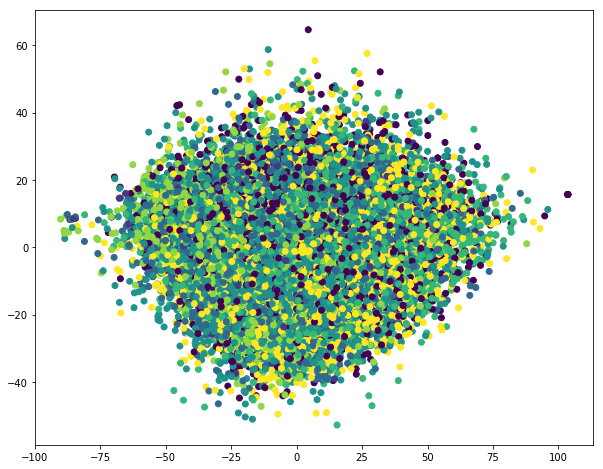

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[0],X_train[1],c=y_train)

In [33]:
from sklearn.svm import LinearSVC
svc=LinearSVC()

In [35]:
svc.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [36]:
predictions=svc.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.20      0.24      0.22      1449
          1       0.12      0.20      0.15       174
          2       0.23      0.18      0.20      1507
          3       0.42      0.45      0.43      2720
          4       0.25      0.28      0.27      1858
          5       0.40      0.40      0.40      1212
          6       0.23      0.18      0.20      1847

avg / total       0.30      0.30      0.30     10767

